In [1]:
!pip install strawberryfields

In [2]:
!pip install pennylane

In [3]:
!python -m pip install pennylane-sf strawberryfields


In [0]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt


In [0]:
# helper functions for 2-qubit CNOT and Hadamard gates

def prep_bell_state():
    psi = np.array([[1],[0],[0],[0]])
    psi = hadamard2(psi)
    psi = cnot(psi)
    
    return psi

In [0]:
def hadamard2(psi):
    """apply a two qubit Hadamard gate to the qubits computational states psi"""
    hadamard2 = np.array([[1,0,1,0],[0,1,0,1],[1,0,-1,0],[0,1,0,-1]])
    
    return 1 / np.sqrt(2) * np.matmul(hadamard2,psi)
    
def prep_2_qubits(alpha, beta, gamma, delta):
    """return two qubit state space represented by $\alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle$"""
    return np.array([[alpha*beta], [alpha * delta], [beta * gamma], [beta * delta]])


def cnot(psi):
    """compute the controlled NOT gate acting on two qubits
    """
    
    cnot =  np.array([[1, 0, 0 ,0],[0, 1,0,0],[0,0,0,1],[0,0,1,0]])
    return np.matmul(cnot, psi)  
  

[[1]
 [0]
 [0]
 [0]]
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


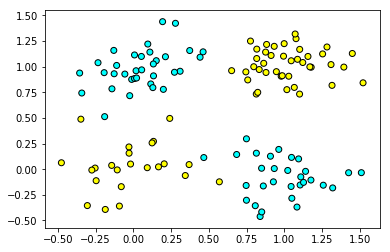

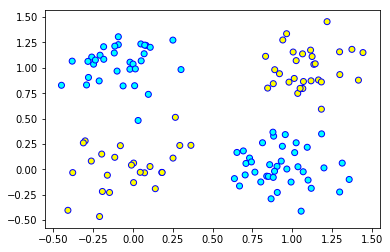

In [7]:


 
psi = [[0],[0],[0],[1]]
alpha =  np.sqrt(0.3)
beta = np.sqrt(0.7)
gamma = np.sqrt(0.25)
delta = np.sqrt(0.75)

psi = np.array([[1],[0],[0],[0]])\
#psi = prep_2_qubits(alpha, beta, gamma, delta)
print(psi)


psi = hadamard2(psi)
print(psi)

psi = cnot(psi)
print(psi)

psi = cnot(psi)
print(psi)


psi = cnot(psi)
print(psi)
  # generate noisy XOR data
def gen_xor_data(num_samples,noise=2e-1):

    x = np.random.randint(0,2,size=(num_samples,2))
    x_noise = x + np.random.randn(num_samples,2)*2e-1

    y = np.ones((num_samples,1))
    for ck in range(num_samples):
        y[ck] = (x[ck,0] or x[ck,1]) and not(x[ck,0] and x[ck,1])
        
    return x_noise,y

num_samples = 128
x_noise,y = gen_xor_data(num_samples)
x_val_noise, y_val = gen_xor_data(num_samples,noise=3e-1)  # check the data

colors = np.ones((num_samples,3))
colors[:,2] = y[:,0]
colors[:,0] = 1-y[:,0]

plt.scatter(x_noise[:,0],x_noise[:,1],c=colors,edgecolors=[0.,0.,0.])
plt.show()

# check the data

colors = np.ones((num_samples,3))
colors[:,2] = y_val[:,0]
colors[:,0] = 1-y_val[:,0]

plt.scatter(x_val_noise[:,0],x_val_noise[:,1],c=colors,edgecolors=[0.,0.,1.])
plt.show()

In [0]:
#dev = qml.device?

In [0]:
dev = qml.device('strawberryfields.fock', wires=2, cutoff_dim=10)

In [0]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0., wires=0)
    qml.Rotation(v[2], wires=0)
    
    qml.Rotation(v[0], wires=1)
    qml.Squeezing(v[1], 0., wires=1)
    qml.Rotation(v[2], wires=1)

    # Bias
    qml.Displacement(v[3], 0., wires=0)
    qml.Displacement(v[3], 0., wires=1)

    # Beamsplitter
    qml.Beamsplitter(v[4],v[5],wires = [0,1])
    
    # Element-wise nonlinear transformation
    qml.Kerr(v[6], wires=0)
    qml.Kerr(v[7], wires=1)
    
    
@qml.qnode(dev)
def quantum_neural_net(var, x=None):
    
    # Encode input x into quantum state
    qml.Displacement(x[0], 0., wires=0)
    qml.Displacement(x[1], 0., wires=1)

    # "layer" subcircuits
    for v in var:
        layer(v)
        
    return qml.expval.X(0)
    #return qml.expval.X(1)

def square_loss(labels, predictions):

    loss = 0.
    for l, p in zip(labels, predictions):
        loss += (l - p) ** 2
    loss = loss / len(labels)

    return loss

def cost(var, features, labels):

    preds = [quantum_neural_net(var, x=x) for x in features]

    return square_loss(labels, preds)  
  


In [0]:
np.random.seed(0)
num_layers = 2
var_init = 0.05 * np.random.randn(num_layers, 8)

var_init  

opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init


Iter:     1 | Cost: 0.3694922 


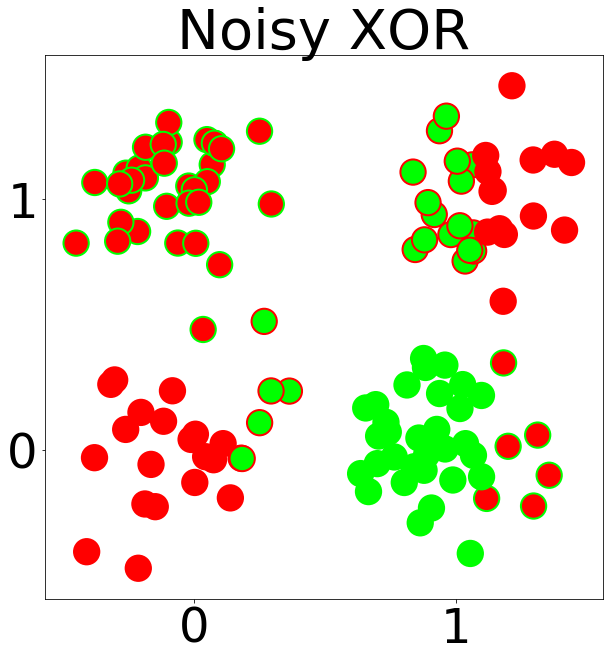

Iter:     2 | Cost: 0.3676503 
Iter:     3 | Cost: 0.3658246 
Iter:     4 | Cost: 0.3640145 
Iter:     5 | Cost: 0.3622194 
Iter:     6 | Cost: 0.3604391 
Iter:     7 | Cost: 0.3586732 
Iter:     8 | Cost: 0.3569214 
Iter:     9 | Cost: 0.3551836 
Iter:    10 | Cost: 0.3534595 
Iter:    11 | Cost: 0.3517491 
Iter:    12 | Cost: 0.3500524 
Iter:    13 | Cost: 0.3483693 
Iter:    14 | Cost: 0.3466998 
Iter:    15 | Cost: 0.3450438 
Iter:    16 | Cost: 0.3434015 
Iter:    17 | Cost: 0.3417728 
Iter:    18 | Cost: 0.3401577 
Iter:    19 | Cost: 0.3385562 
Iter:    20 | Cost: 0.3369681 
Iter:    21 | Cost: 0.3353936 


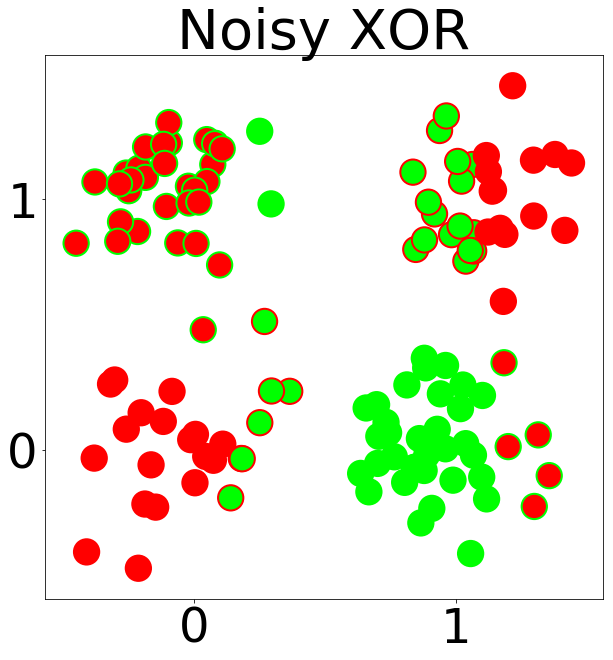

Iter:    22 | Cost: 0.3338325 
Iter:    23 | Cost: 0.3322846 
Iter:    24 | Cost: 0.3307500 
Iter:    25 | Cost: 0.3292284 
Iter:    26 | Cost: 0.3277197 
Iter:    27 | Cost: 0.3262238 
Iter:    28 | Cost: 0.3247404 
Iter:    29 | Cost: 0.3232695 
Iter:    30 | Cost: 0.3218108 
Iter:    31 | Cost: 0.3203641 
Iter:    32 | Cost: 0.3189293 
Iter:    33 | Cost: 0.3175062 
Iter:    34 | Cost: 0.3160946 


In [0]:
for it in range(100):
    #var = opt.step(lambda v: cost(v, x, y), var)
    
    var = opt.step(lambda v: cost(v, x_noise, y), var)
    
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it + 1, cost(var, x_noise, y)[0]))
    
    if it % 20 == 0:
        
        x_val_noise = x_val_noise + np.random.randn(num_samples,2)*1e-3
        predictions = np.round(np.array([quantum_neural_net(var, x=x_) for x_ in x_val_noise]))

        
        colors = np.zeros((num_samples,3))
        colors[:,1] = predictions #- (y[:,0])
        colors[:,0] = 1 - predictions
        
        colors[colors<0] = 0.
        colors[colors>1] = 1.
        
        edge_colors = np.zeros((num_samples,3))
        edge_colors[:,1] = y_val[:,0]
        edge_colors[:,0] = 1. - y_val[:,0]
        
        edge_colors[edge_colors<0] = 0.
        edge_colors[edge_colors>1] = 1.
        
        fig, axes = plt.subplots(1,1,figsize=(10,10))
        
        axes.scatter(x_val_noise[:,0],x_val_noise[:,1],c=colors,edgecolors=edge_colors,lw=2,s=640)
        axes.set_xticks([0,1])
        axes.set_xticklabels(['0','1'],fontsize=48)
        axes.set_yticks([0,1])
        axes.set_yticklabels(['0','1'],fontsize=48)
        plt.title("Noisy XOR",fontsize=56)
        if(0):
            plt.savefig('noisy_xor%i.png'%it)
        plt.show()  